# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('data_clean.pkl')
data

,transcript
adam,adam sandler love you transcript scraps fr...
ali,ali wong baby cobra transcript scraps from...
anthony,anthony jeselnik thoughts and prayers full ...
bill,bill burr im sorry you feel that way full t...
bo,scraps from the loft \t\tskip to content \t\t...
dave,dave chappelle the age of spin transcript ...
dylan,dylan moran yeah yeah transcript scraps fr...
hasan,scraps from the loft \t\tskip to content \t\t...
jamie,jamie foxx what had happened was transcript...
jim,jim jefferies bare full transcript scraps ...


In [2]:
full_names = ['Adam Sandler', 'Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham',  'Dave Chappelle', 'Dylan Moran', 'Hasan Minhaj', 'Jamie Foxx', 
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Kelsey Cook', 'Kevin James', 'Louis C.K.', 'Mike Birbiglia', 'Ramy Youssef', 'Ricky Gervais', 'Sal Vulcano', 'Seth Meyers']

data['full_name'] = full_names
data

,transcript,full_name
adam,adam sandler love you transcript scraps fr...,Adam Sandler
ali,ali wong baby cobra transcript scraps from...,Ali Wong
anthony,anthony jeselnik thoughts and prayers full ...,Anthony Jeselnik
bill,bill burr im sorry you feel that way full t...,Bill Burr
bo,scraps from the loft \t\tskip to content \t\t...,Bo Burnham
dave,dave chappelle the age of spin transcript ...,Dave Chappelle
dylan,dylan moran yeah yeah transcript scraps fr...,Dylan Moran
hasan,scraps from the loft \t\tskip to content \t\t...,Hasan Minhaj
jamie,jamie foxx what had happened was transcript...,Jamie Foxx
jim,jim jefferies bare full transcript scraps ...,Jim Jefferies


In [4]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
adam,adam sandler love you transcript scraps fr...,Adam Sandler,0.002679,0.568411
ali,ali wong baby cobra transcript scraps from...,Ali Wong,0.069140,0.482556
anthony,anthony jeselnik thoughts and prayers full ...,Anthony Jeselnik,0.055335,0.559077
bill,bill burr im sorry you feel that way full t...,Bill Burr,0.010845,0.544780
bo,scraps from the loft \t\tskip to content \t\t...,Bo Burnham,0.550000,0.350000
dave,dave chappelle the age of spin transcript ...,Dave Chappelle,0.002163,0.513960
dylan,dylan moran yeah yeah transcript scraps fr...,Dylan Moran,0.083442,0.525189
hasan,scraps from the loft \t\tskip to content \t\t...,Hasan Minhaj,0.550000,0.350000
jamie,jamie foxx what had happened was transcript...,Jamie Foxx,0.073814,0.511730
jim,jim jefferies bare full transcript scraps ...,Jim Jefferies,0.041763,0.535762


C:\Users\Mandar Garud\AppData\Local\Temp\ipykernel_19940\1203011468.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)


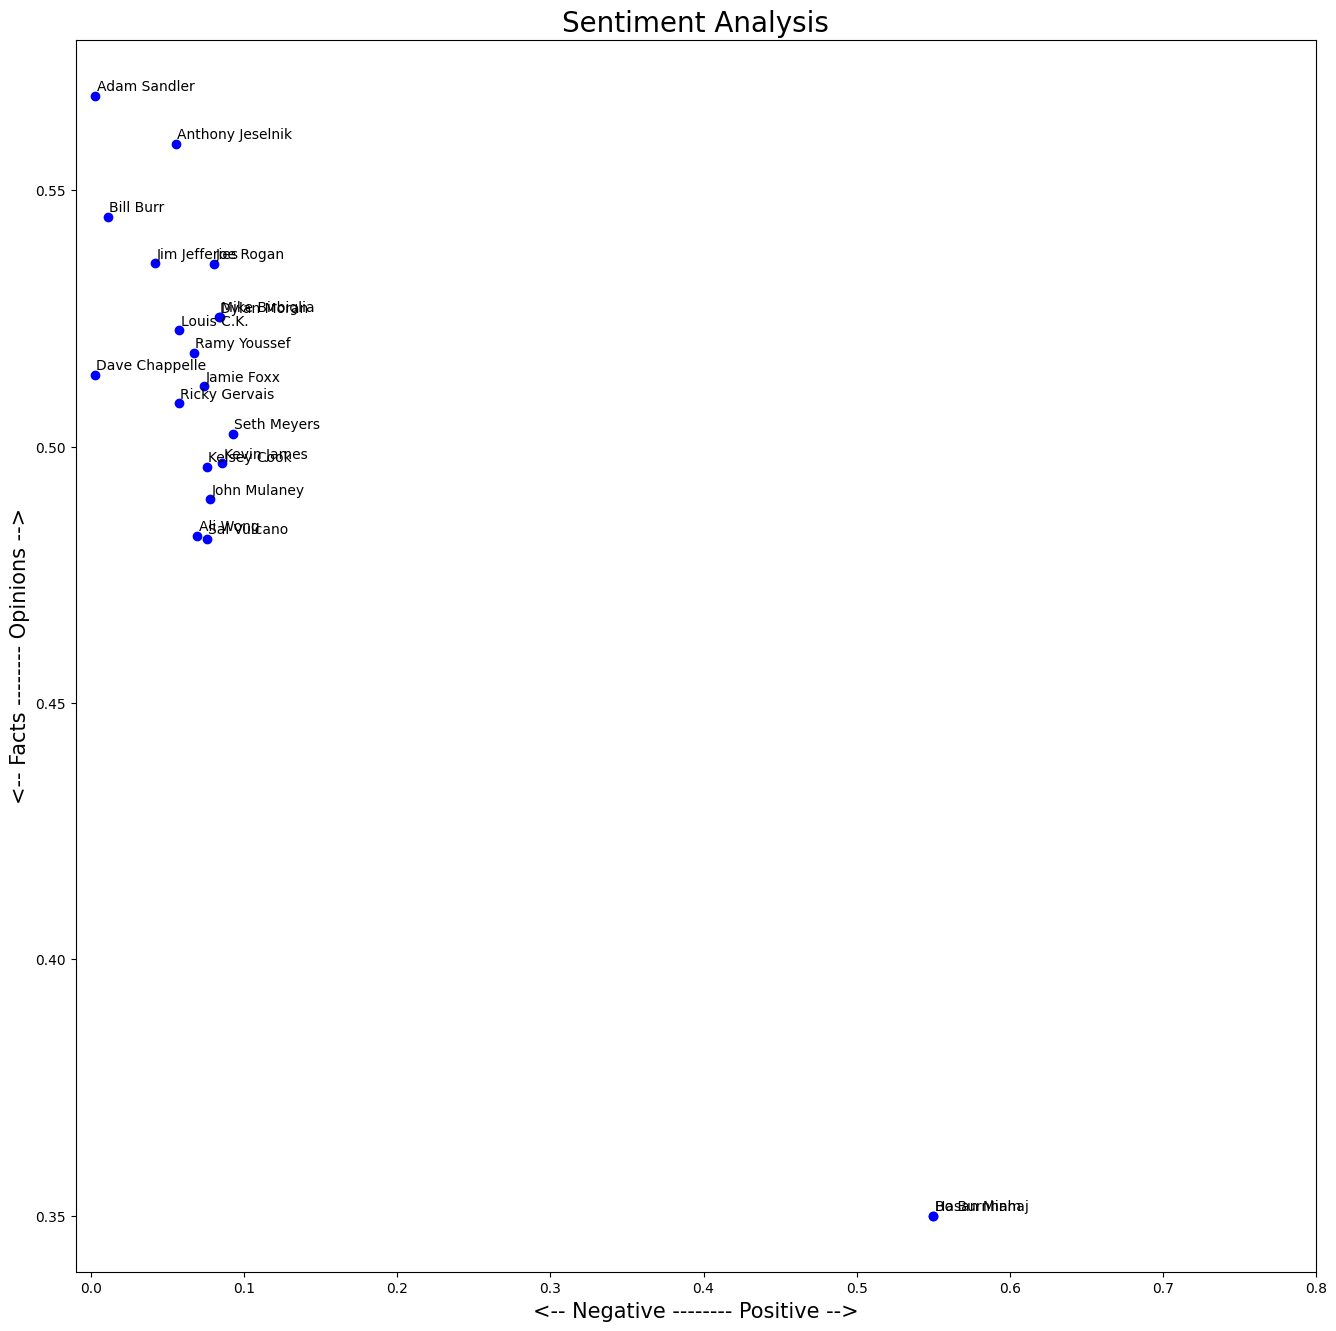

In [5]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 16]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .8) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [6]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [7]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
adam,adam sandler love you transcript scraps fr...,Adam Sandler,0.002679,0.568411
ali,ali wong baby cobra transcript scraps from...,Ali Wong,0.069140,0.482556
anthony,anthony jeselnik thoughts and prayers full ...,Anthony Jeselnik,0.055335,0.559077
bill,bill burr im sorry you feel that way full t...,Bill Burr,0.010845,0.544780
bo,scraps from the loft \t\tskip to content \t\t...,Bo Burnham,0.550000,0.350000
dave,dave chappelle the age of spin transcript ...,Dave Chappelle,0.002163,0.513960
dylan,dylan moran yeah yeah transcript scraps fr...,Dylan Moran,0.083442,0.525189
hasan,scraps from the loft \t\tskip to content \t\t...,Hasan Minhaj,0.550000,0.350000
jamie,jamie foxx what had happened was transcript...,Jamie Foxx,0.073814,0.511730
jim,jim jefferies bare full transcript scraps ...,Jim Jefferies,0.041763,0.535762


In [8]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' adam sandler love you   transcript  scraps from the loft \t\tskip to content \t\t\t\t\t\tsearch\t\t\t\t\t  moviesmovie reviewsmovie transcriptstv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooksopinions  moviesmovie reviewsmovie transcriptstv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooksopinions comedy adam sandler love you   transcript august   \t\t\t\t\tafter a rather oddly chaotic beginning adam arrives late to the gig driving a car with a broken windshield the show gains momentum two songs exemplify typical sandler humor bulldog in a halloween costume and the drone song\t\t\t\t  back up back up♪ its gonna take a lotta love ♪ ♪ to get us through the night ♪yo vil what happened i thought you guys were fixing this shit im driving in the car like this putting my head out the window spilled fuckin coffee itll be done bos

In [9]:
# The list has 10 elements, one for each transcript
len(list_pieces)

20

In [10]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [11]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript[0]

[-0.04036584330701979,
 0.10869895382395381,
 -0.07505617398474541,
 -0.03236193783068783,
 -0.10216209716209715,
 -0.12910353535353536,
 0.07432140670777035,
 -0.05156138645934565,
 0.11079134366925067,
 0.21645041911895857]

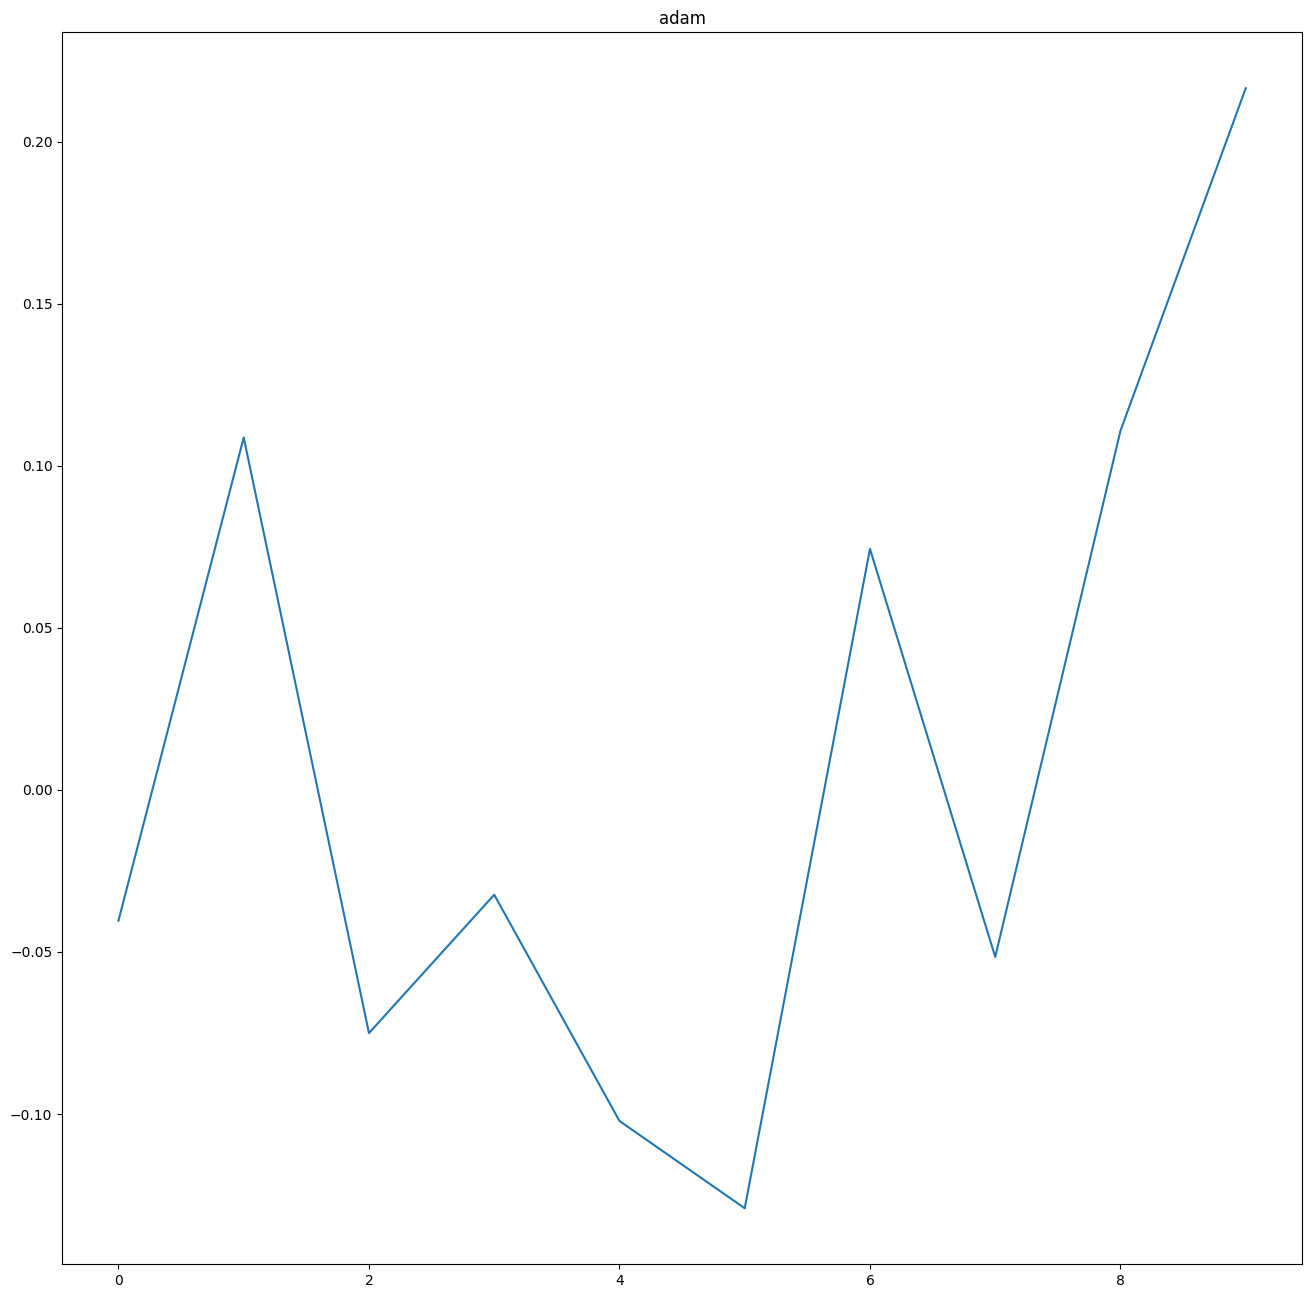

In [12]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

C:\Users\Mandar Garud\AppData\Local\Temp\ipykernel_19940\2873325229.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


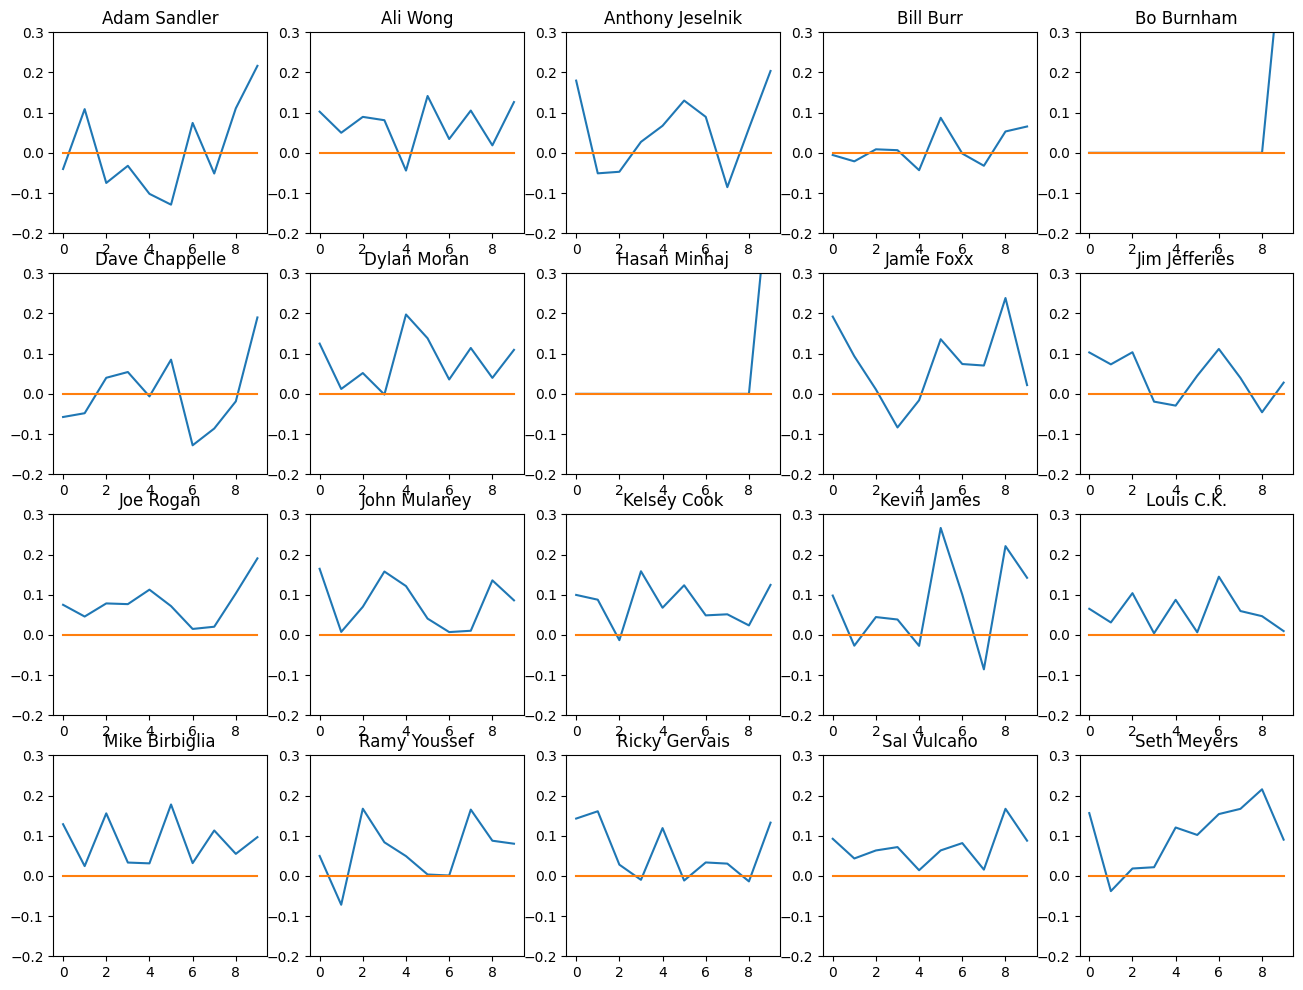

In [13]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.

In [14]:
n_values = range(5, 21)
results = []

for n in n_values:
    intra_variances = []

    for _, row in data.iterrows():
        chunks = split_text(row['transcript'], n)
        if len(chunks) != n:
            continue

        polarities = [TextBlob(chunk).sentiment.polarity for chunk in chunks]
        subjectivities = [TextBlob(chunk).sentiment.subjectivity for chunk in chunks]

        var_pol = np.var(polarities)
        var_sub = np.var(subjectivities)
        combined_var = (var_pol + var_sub) / 2  
        intra_variances.append(combined_var)

    if intra_variances:
        mean_var = np.mean(intra_variances)
        results.append((n, mean_var))

optimal = min(results, key=lambda x: x[1])
print(f"Optimal n (lowest variance): {optimal[0]}")
print(f"Average Sentiment Variance: {optimal[1]:.4f}")


Optimal n (lowest variance): 7
Average Sentiment Variance: 0.0043


- Optimal value of n obtained = 7
- values of n were checked from 5 onwards since lack of information is provided in case of lesser values of n 
- To find the optimal value of 'n' I ensured that the polarities and subjectivities of the sections of each comedy routine are consistent 

In [15]:
list_pieces = []
for t in data.transcript:
    split = split_text(t, n = optimal[0])
    list_pieces.append(split)
    
list_pieces

[[' adam sandler love you   transcript  scraps from the loft \t\tskip to content \t\t\t\t\t\tsearch\t\t\t\t\t  moviesmovie reviewsmovie transcriptstv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooksopinions  moviesmovie reviewsmovie transcriptstv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooksopinions comedy adam sandler love you   transcript august   \t\t\t\t\tafter a rather oddly chaotic beginning adam arrives late to the gig driving a car with a broken windshield the show gains momentum two songs exemplify typical sandler humor bulldog in a halloween costume and the drone song\t\t\t\t  back up back up♪ its gonna take a lotta love ♪ ♪ to get us through the night ♪yo vil what happened i thought you guys were fixing this shit im driving in the car like this putting my head out the window spilled fuckin coffee itll be done bos

In [16]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript[0]

[0.013294853294853292,
 -0.024771627112052635,
 -0.05620813680515172,
 -0.0766688199827735,
 -0.015272678710178737,
 0.014506202039314622,
 0.18931228741496614]

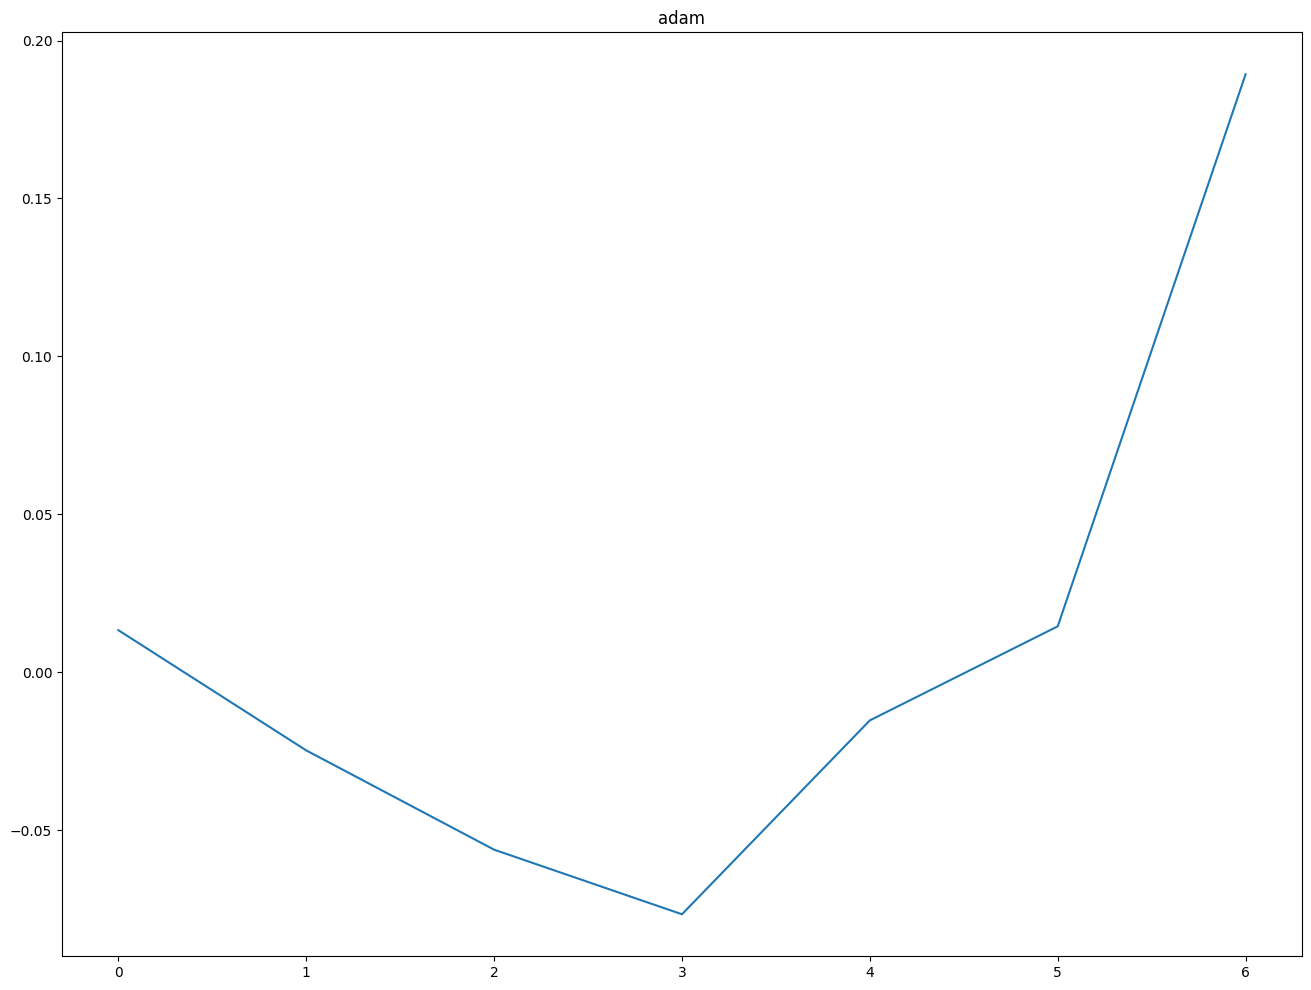

In [17]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

C:\Users\Mandar Garud\AppData\Local\Temp\ipykernel_19940\1191454182.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


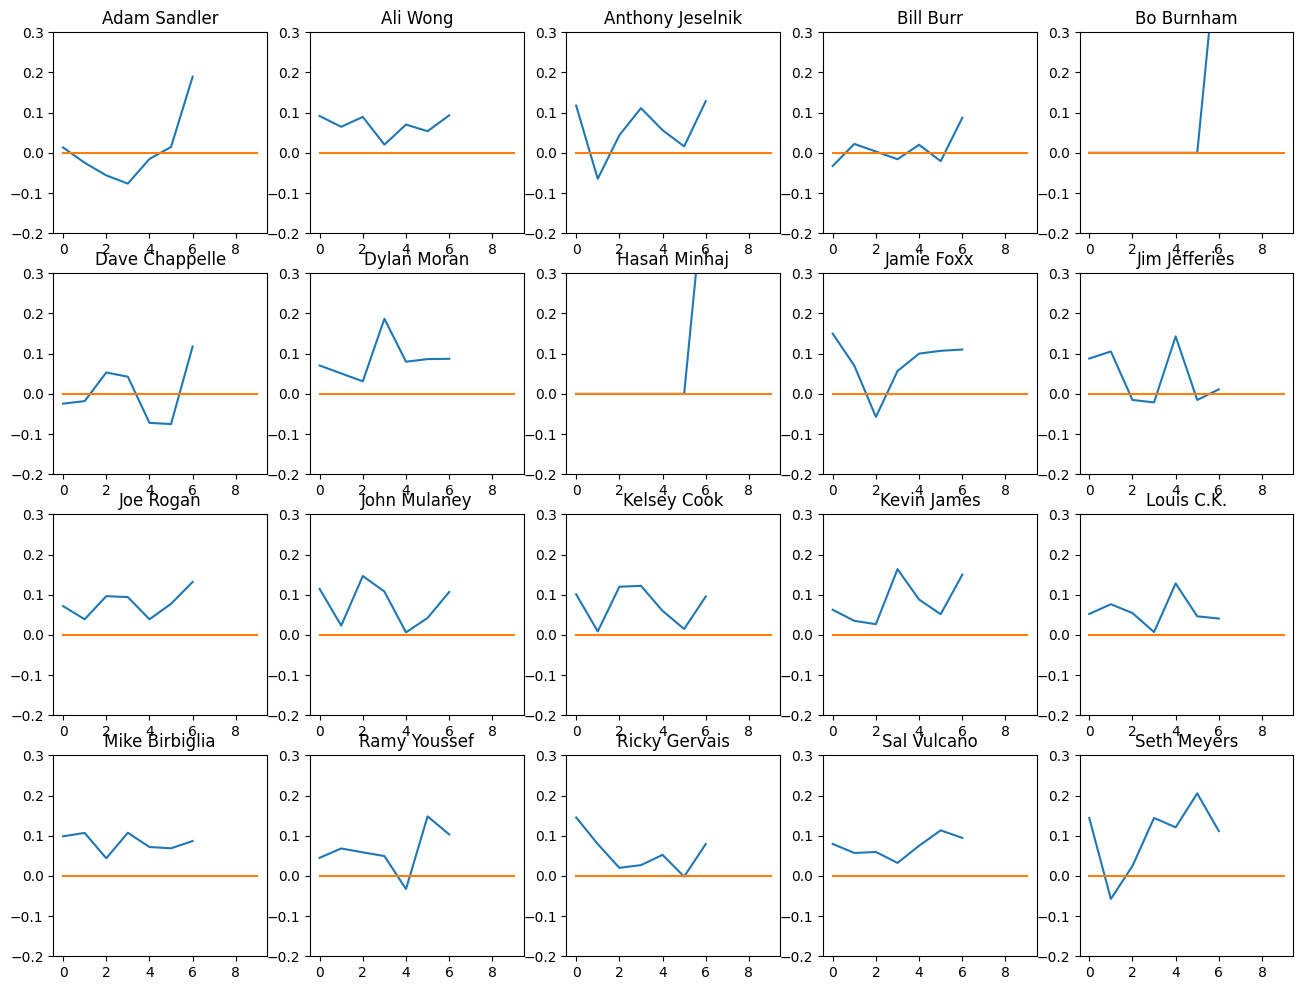

In [18]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [78]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript[1]

[0.5585365853658537,
 0.3919231057202755,
 0.4870198624904507,
 0.4842863737218575,
 0.46721369233051474,
 0.5544963369963369,
 0.4895683020683019]

C:\Users\Mandar Garud\AppData\Local\Temp\ipykernel_12384\3400698547.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


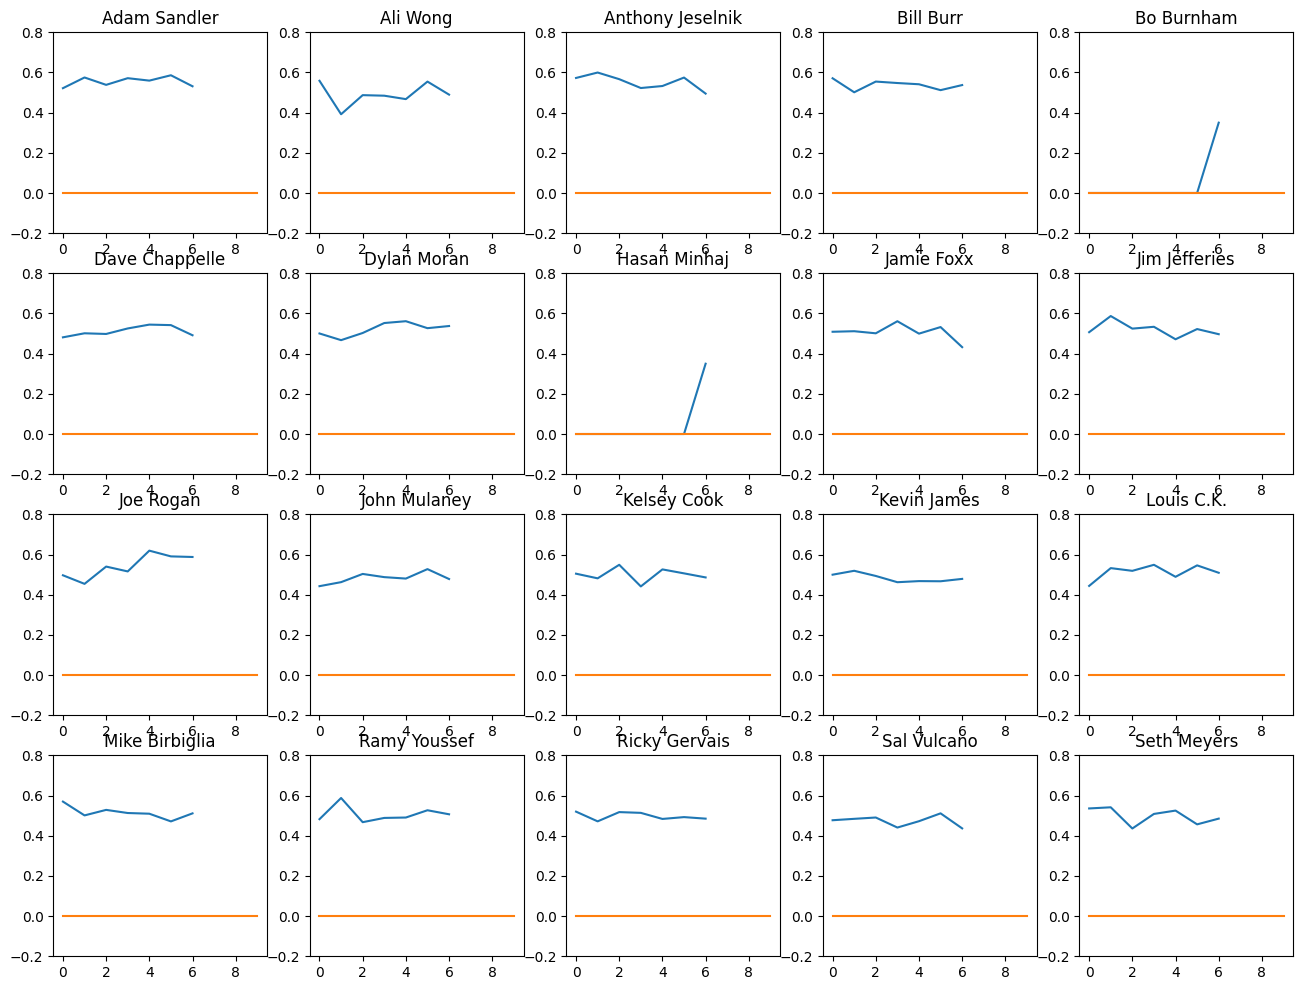

In [79]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.8)
    
plt.show()

- Despite the optimal value of n taken, the polarities and subjectivities of Bo Burnham and Hasan Minhaj consistently increase. 